In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns
from sklearn import mixture

In [2]:
x_1 = np.random.normal(-5,1,3000)
x_2 = np.random.normal(2,3,7000)
x = np.concatenate((x_1, x_2))

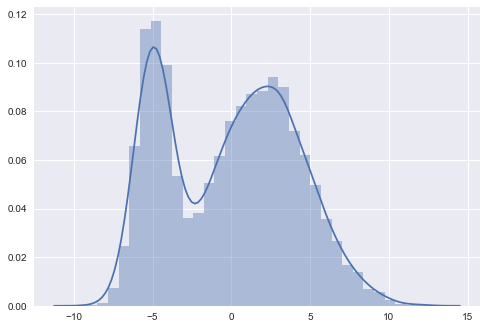

In [3]:
sns.distplot(x)
show()

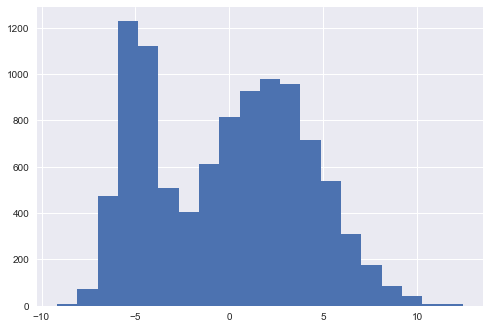

In [4]:
plt.hist(x, bins=20)
show()

In [5]:
gmm = mixture.GaussianMixture(n_components=2, verbose=1)
gmm.fit(x.reshape(-1,1))

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
gmm.means_

array([[-4.95016999],
       [ 2.09890473]])

In [7]:
gmm.covariances_

array([[[1.08455755]],

       [[8.40575326]]])

In [8]:
gmm.weights_

array([0.31675002, 0.68324998])

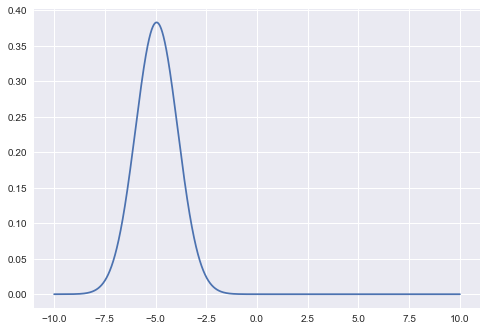

In [9]:
x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis,sp.stats.norm.pdf(x_axis,gmm.means_[0], gmm.covariances_[0]**.5)[0])
show()

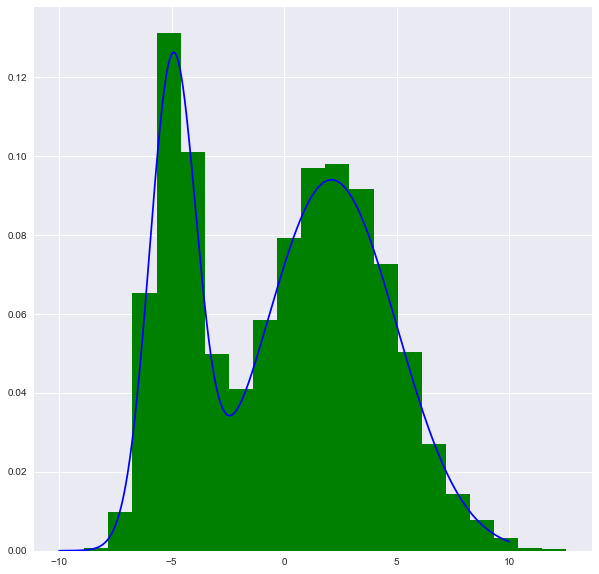

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
S = gmm.sample(10000)[0]
ax.hist(S,weights=np.ones_like(S) / len(S), bins=20, color='g')
x_axis = np.arange(-10, 10, 0.001)
y_1 = sp.stats.norm.pdf(x_axis,gmm.means_[0], gmm.covariances_[0]**.5)[0]
y_2 = sp.stats.norm.pdf(x_axis,gmm.means_[1], gmm.covariances_[1]**.5)[0]
y = np.add(gmm.weights_[0]*y_1 , gmm.weights_[1]*y_2)
ax.plot(x_axis, y, color='b')
show()

In [11]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.6, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

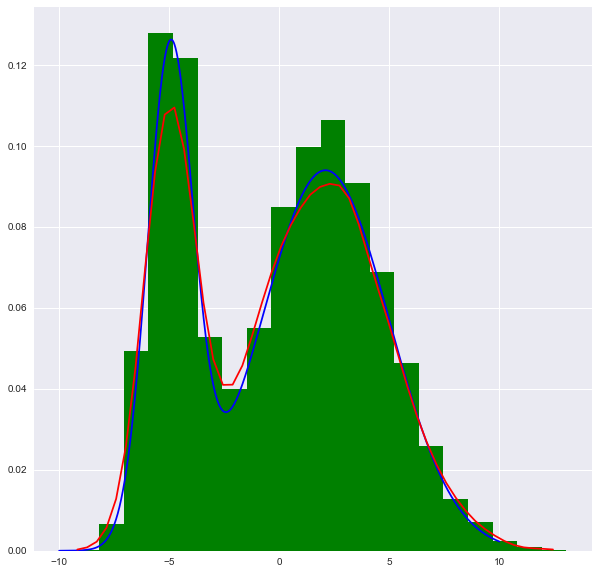

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
S = gmm.sample(10000)[0]
ax.hist(S,weights=np.ones_like(S) / len(S), bins=20, color='g')
x_axis = np.arange(-10, 10, 0.001)
y_1 = sp.stats.norm.pdf(x_axis,gmm.means_[0], gmm.covariances_[0]**.5)[0]
y_2 = sp.stats.norm.pdf(x_axis,gmm.means_[1], gmm.covariances_[1]**.5)[0]
y = np.add(gmm.weights_[0]*y_1 , gmm.weights_[1]*y_2)
ax.plot(x_axis, y, color='b')
s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
ax.plot(s, np.exp(log_pdf), color='r')
show()

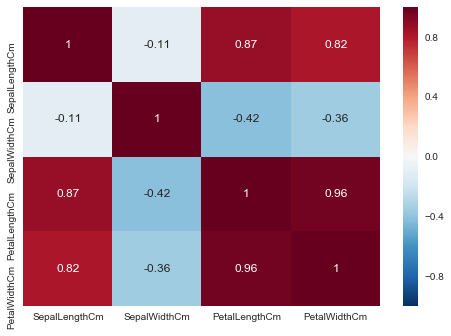

In [13]:
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)
show()

# Here is the correlation computation function, 3 versions

### Brute force computation from equation

In [14]:
def Pcorr(x,y):
    try:
        assert len(x) == len(y), "Input not of equal length"
    except AssertionError as e:
        raise
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    cov = np.sum([(x[i] - x_mean)*(y[i] - y_mean) for i in range(len(x))])
    x_var = np.sum([(x[i] - x_mean)**2 for i in range(len(x))])
    y_var = np.sum([(y[i] - y_mean)**2 for i in range(len(y))])
    return cov/x_var**.5/y_var**.5

In [15]:
Pcorr(df['PetalLengthCm'],df['SepalLengthCm'])

0.8717541573048712

### Scipy built in function

In [16]:
sp.stats.pearsonr(df['PetalLengthCm'],df['SepalLengthCm'])

(0.8717541573048712, 1.0384540627941809e-47)

### Using np.cov to compute the covariance step

In [17]:
def Pcorr_np(x,y):
    try:
        assert len(x) == len(y), "Input not of equal length"
    except AssertionError as e:
        raise
    cov = np.cov(x,y, ddof=1)
    return cov[0][1]/np.sqrt(cov[0][0])/np.sqrt(cov[1][1])

In [18]:
Pcorr_np(df['PetalLengthCm'],df['SepalLengthCm'])

0.8717541573048718